<a href="https://colab.research.google.com/github/Sutriadik/Pejuang-Data_Science/blob/main/Mini_Project_SutriadiK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Impor Libraries dan Data




In [163]:
import pandas as pd                           
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#Import Modul PloltLy Express
import plotly.express as px
%matplotlib inline

In [164]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Mengakses dataset

In [142]:
df = pd.read_csv('/content/drive/MyDrive/water_potability.csv')
df

ph    Hardness  ...  Turbidity  Potability
0          NaN  204.890455  ...   2.963135           0
1     3.716080  129.422921  ...   4.500656           0
2     8.099124  224.236259  ...   3.055934           0
3     8.316766  214.373394  ...   4.628771           0
4     9.092223  181.101509  ...   4.075075           0
...        ...         ...  ...        ...         ...
3271  4.668102  193.681735  ...   4.435821           1
3272  7.808856  193.553212  ...   2.798243           1
3273  9.419510  175.762646  ...   3.298875           1
3274  5.126763  230.603758  ...   4.708658           1
3275  7.874671  195.102299  ...   2.309149           1

[3276 rows x 10 columns]

#Kualitas Air



##Latar Belakang Dataset

air merupakan sebuah sumber kehidupan dan tanda kehidupan. Sumber kehidupan karena setiap makhluk yang hidup di muka bumi ini memerlukan air untuk bisa bertahan hidup.

air merupakan senyawa yang memiliki peran penting dalam mendukung segala sisi kehidupan bagi makhluk hidup yang ada di permukaan bumi ini. Saat ini marak terjadi pencemaran air yang berasal dari limbah industri yang membuat kualitas air menjadi menurun untuk dikonsumsi oleh manusia.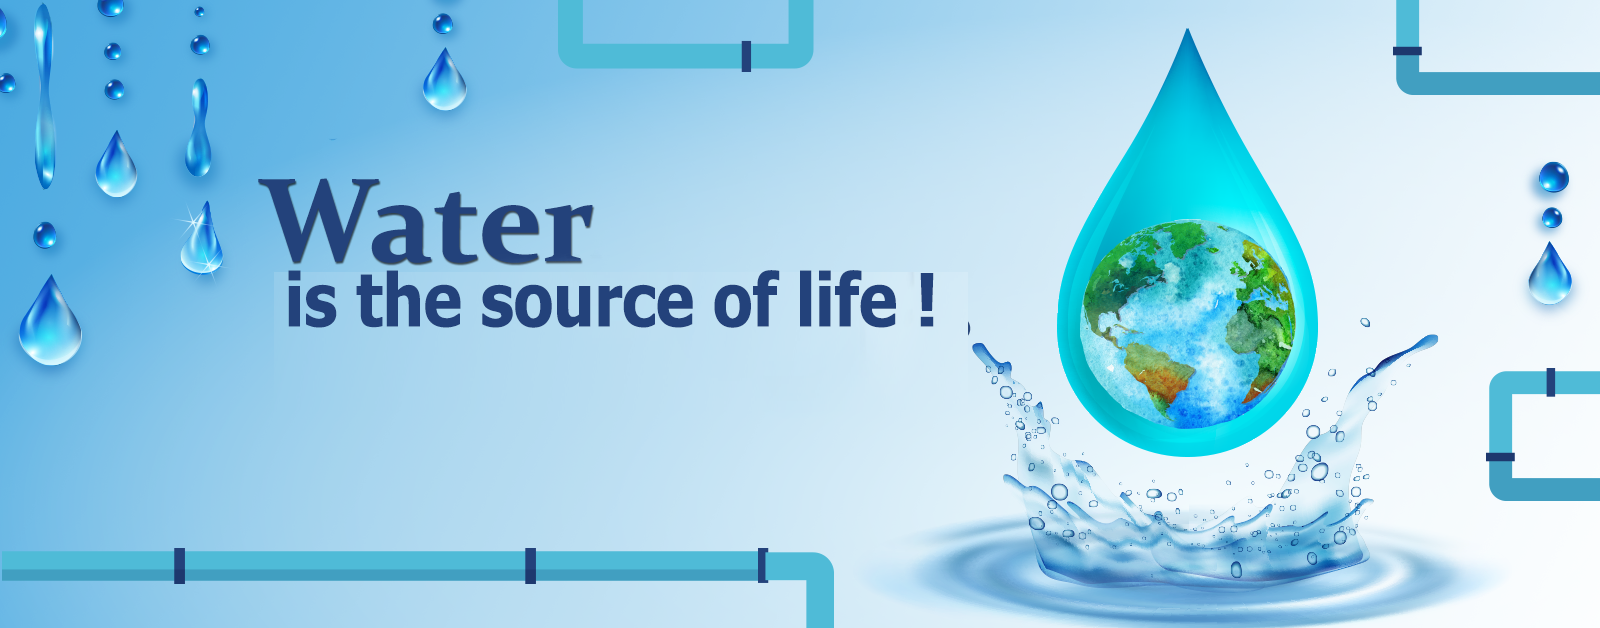

Oleh karena itu, kita perlu mengkategorikan batas aman kandungan air yang dapat diminum



## Pemahaman Variabel dalam data set

- ph -> derajat Keasaman dari air (tingkat keasaman)

- Hardness -> Tingkat Kesadahan air in mg / l.

- Solids -> Total padatan terlarut per ppm.

- Chloramines -> jumlah kloramin  per ppm.

- Sulfate -> kadar zat sulfat Terlarut per ppm.

- Conductivity -> ukuran kemampuan air untuk menghantarkan arus listrik  dalam (μS/cm).

- Organic carbon -> Kadar organic karbon per ppm.

- Trihalomethanes -> Kadar zat trihalomethanes yang terkadandung dalam (μg/L).

- Turbidity -> Tingkat kekeruhan dari air dalam satuan (NTU) (Nephelometric Turbidity Units).

- Potability -> Mengindikasikan apakah air layak atau tidak layak untuk konsumsi manusia 

(Angka 0 menyatakan air tidak layak dikonsumsi, sedangkan angka 1 menyatakan air dapat diminum)


## Pertanyaan Analisis

1.   Bagaimana standar Kualitas air yang aman untuk dikonsumsi untuk manusia?
2.   Korelasi tiap variabel terhadap potability?
3.   Berapa banyak data dari sampel air yang dapat dikonsumsi?
4    Penyajian Data dan visualisasi data


##EDA (Exploratory Data Analysis)

In [143]:
df.shape

(3276, 10)

Data yang kita miliki terdapat 10 kolom dan 3276 baris

In [144]:
df.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

Semua nilai data berupa angka dengan 9 tipe float dan 1 integer

## Menunjukkan Statistika Deskriptif dari data

In [145]:
df.describe()

ph     Hardness  ...    Turbidity   Potability
count  2785.000000  3276.000000  ...  3276.000000  3276.000000
mean      7.080795   196.369496  ...     3.966786     0.390110
std       1.594320    32.879761  ...     0.780382     0.487849
min       0.000000    47.432000  ...     1.450000     0.000000
25%       6.093092   176.850538  ...     3.439711     0.000000
50%       7.036752   196.967627  ...     3.955028     0.000000
75%       8.062066   216.667456  ...     4.500320     1.000000
max      14.000000   323.124000  ...     6.739000     1.000000

[8 rows x 10 columns]

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


## Proses mengecek Missing Value

In [147]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

- Pada variabel Ph terdapat 491 data yang tidak memiliki nilai 

- Pada variabel sulfate terdapat 781 data yang tidak memiliki nilai 

- Pada variabel Trihalomethanes terdapat 162 data yang tidak memiliki nilai

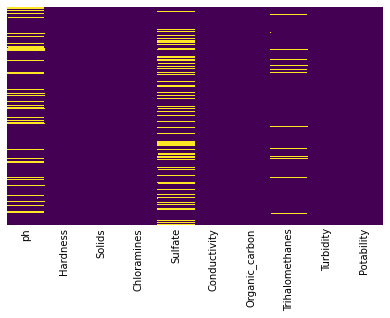

In [148]:
sns.heatmap(df.isnull(),cbar=False,yticklabels=False,cmap = 'viridis')

Kolom-kolom dengan data kosong adalah: Ph, Sulfate, Trihalomethanes

## Mengecek Data pencilan (outlier)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



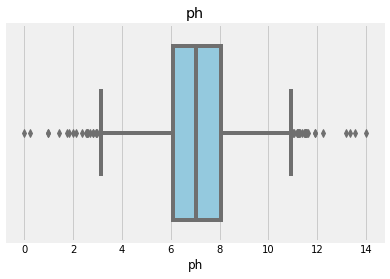

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



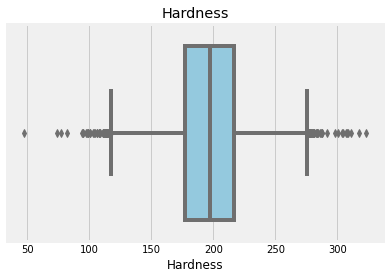

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



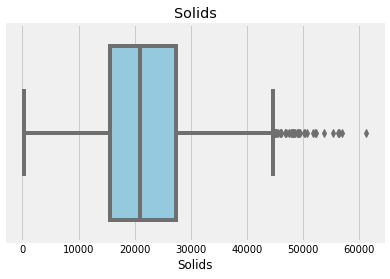

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



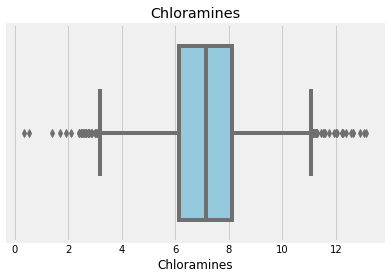

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



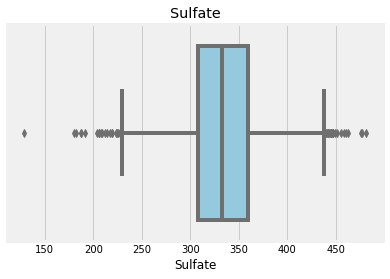

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



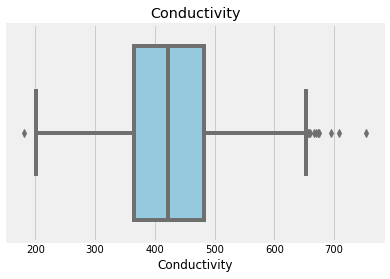

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



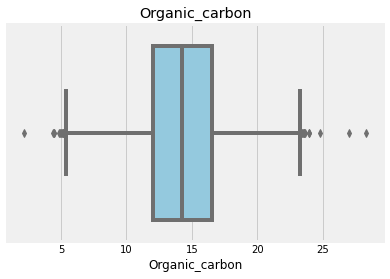

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



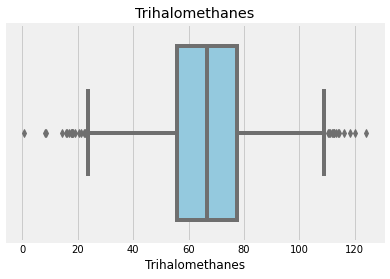

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



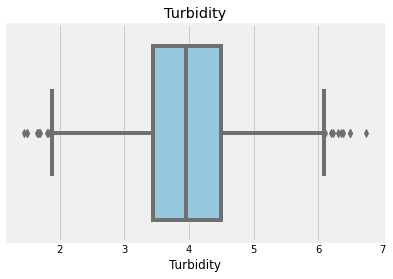

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



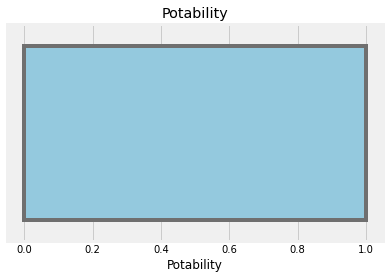

In [154]:
for i in df.columns:
    sns.boxplot(df[i],color='skyblue')
    plt.title(i)
    plt.show()

### Korelasi Data

In [150]:
df.corr()

ph  Hardness  ...  Turbidity  Potability
ph               1.000000  0.082096  ...  -0.039057   -0.003556
Hardness         0.082096  1.000000  ...  -0.014449   -0.013837
Solids          -0.089288 -0.046899  ...   0.019546    0.033743
Chloramines     -0.034350 -0.030054  ...   0.002363    0.023779
Sulfate          0.018203 -0.106923  ...  -0.011187   -0.023577
Conductivity     0.018614 -0.023915  ...   0.005798   -0.008128
Organic_carbon   0.043503  0.003610  ...  -0.027308   -0.030001
Trihalomethanes  0.003354 -0.013013  ...  -0.022145    0.007130
Turbidity       -0.039057 -0.014449  ...   1.000000    0.001581
Potability      -0.003556 -0.013837  ...   0.001581    1.000000

[10 rows x 10 columns]

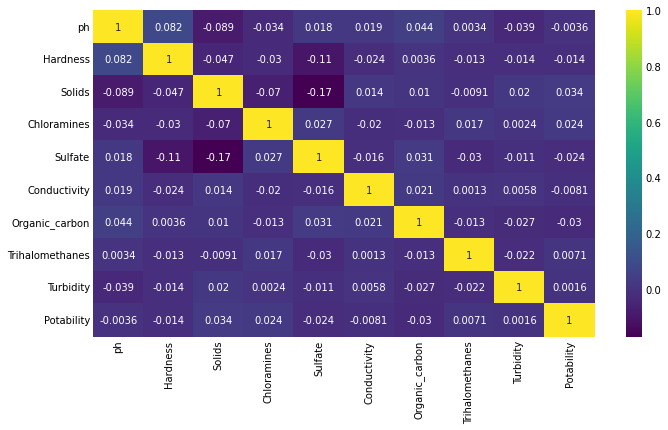

In [151]:
df1=df.select_dtypes(include=['float64', 'int64'])
k = len(df1.columns)
cm = df1.corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap = 'viridis')

### Plot Distribusi Data Numerik


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/di

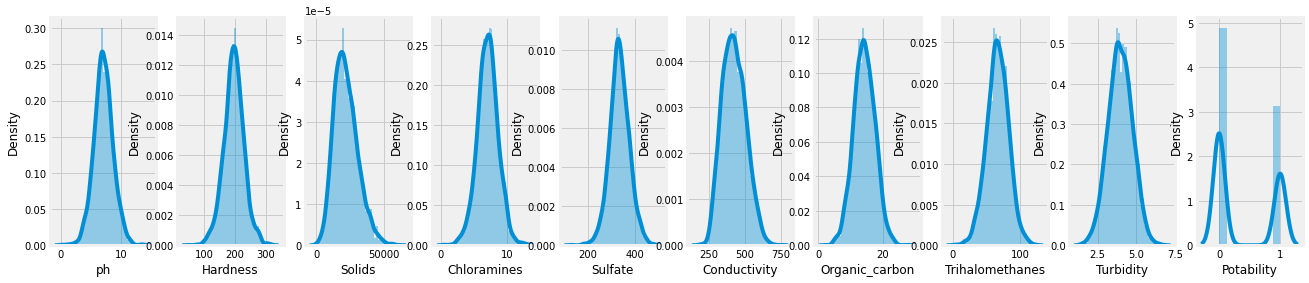

In [159]:
l = df1.columns.values
number_of_columns=len(df1.columns)
number_of_rows = len(l)-1/number_of_columns
plt.figure(figsize=(2*number_of_columns,5*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.distplot(df[l[i]],kde=True) 

dari ke 10 data, 

- nampak secara visual grafik,kurva sangat runcing  dan kurva distribusi secara leptokurtik.
- cenderung terdistribusi normal. skewnessnya cenderung mendekati nol

## Cek Nilai Skewness dan kurtosis

In [156]:
df.skew()

ph                 0.025630
Hardness          -0.039342
Solids             0.621634
Chloramines       -0.012098
Sulfate           -0.035947
Conductivity       0.264490
Organic_carbon     0.025533
Trihalomethanes   -0.083031
Turbidity         -0.007817
Potability         0.450784
dtype: float64

In [24]:
df.kurtosis()

ph                 0.720316
Hardness           0.615772
Solids             0.442826
Chloramines        0.589901
Sulfate            0.648263
Conductivity      -0.277093
Organic_carbon     0.044409
Trihalomethanes    0.238597
Turbidity         -0.062801
Potability        -1.797892
dtype: float64

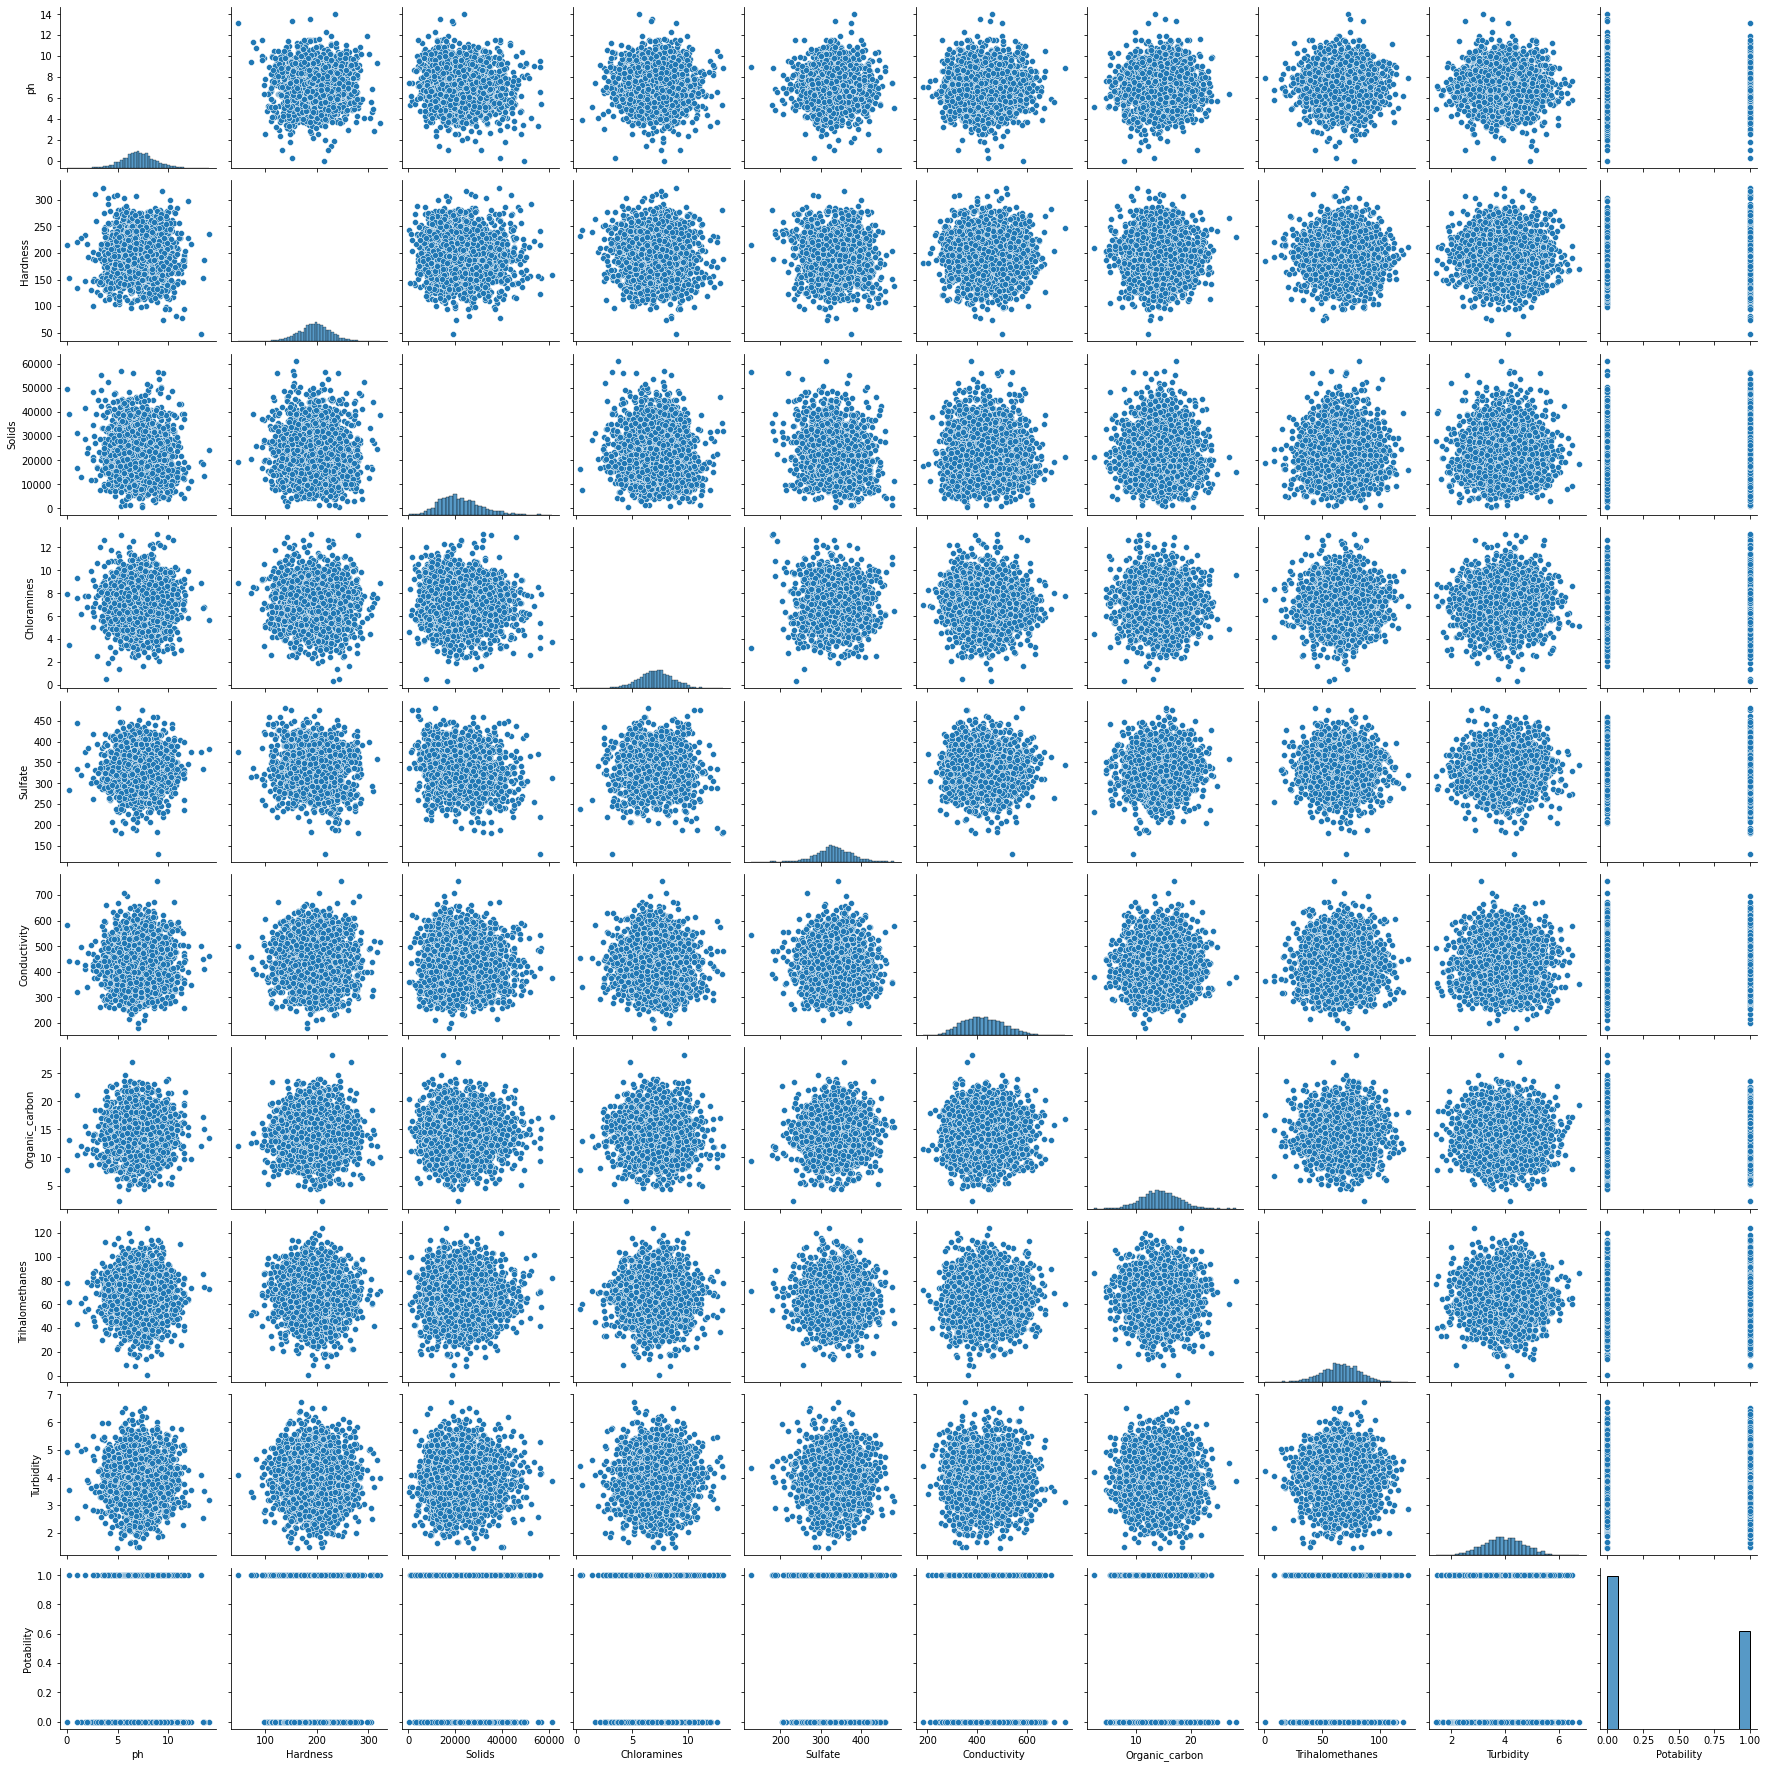

In [25]:
g = sns.pairplot(df1)


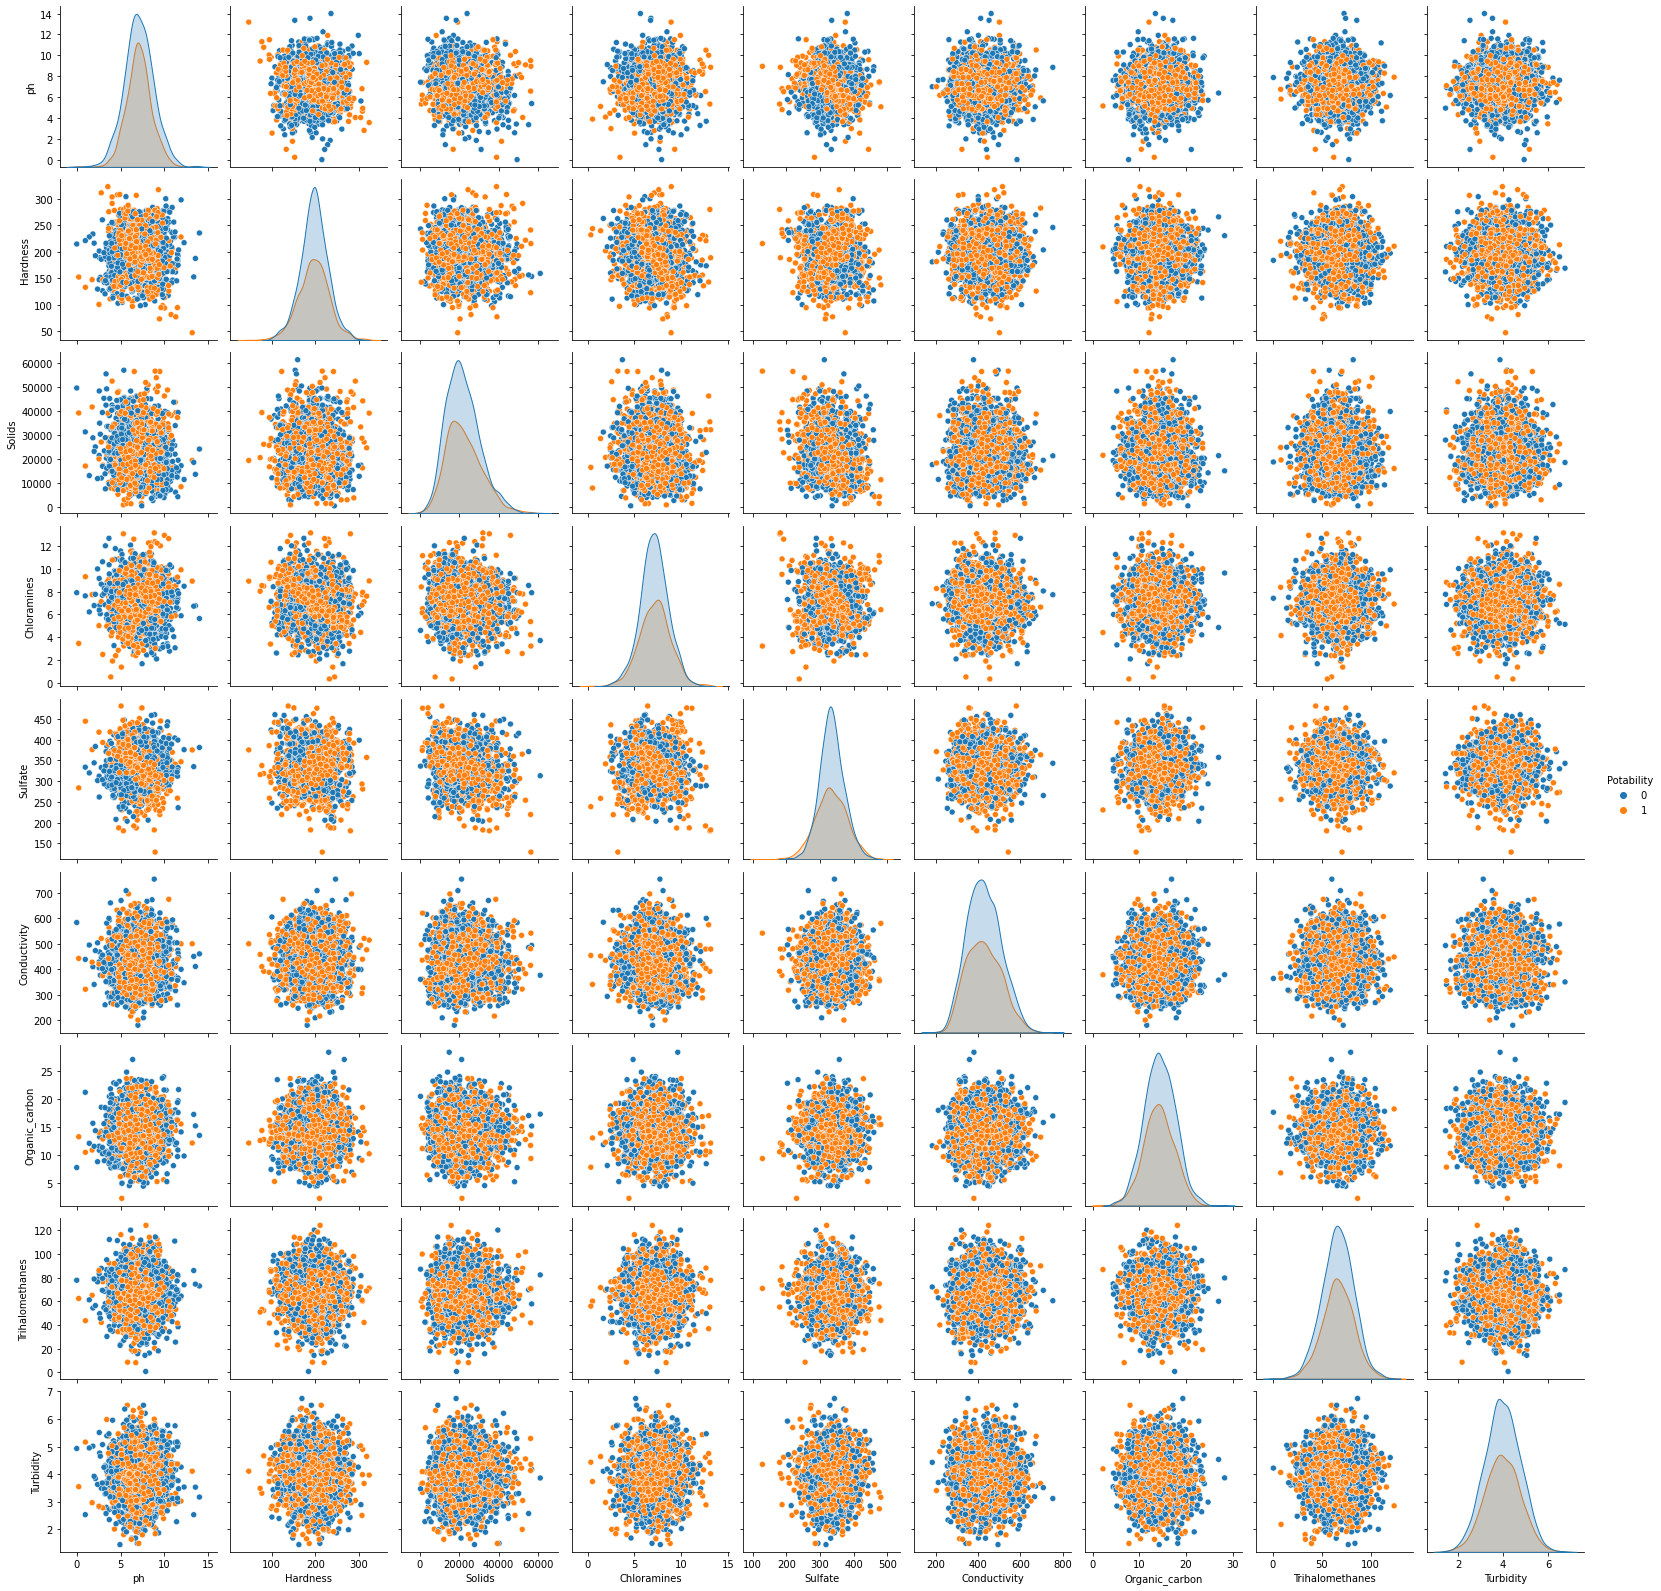

In [26]:
g = sns.pairplot(df1, hue="Potability")

Plot ini untuk mengetahui plot untuk masing-masing pasangan data numerik

## Distribusi dari masing- masing variabel terhadap potability

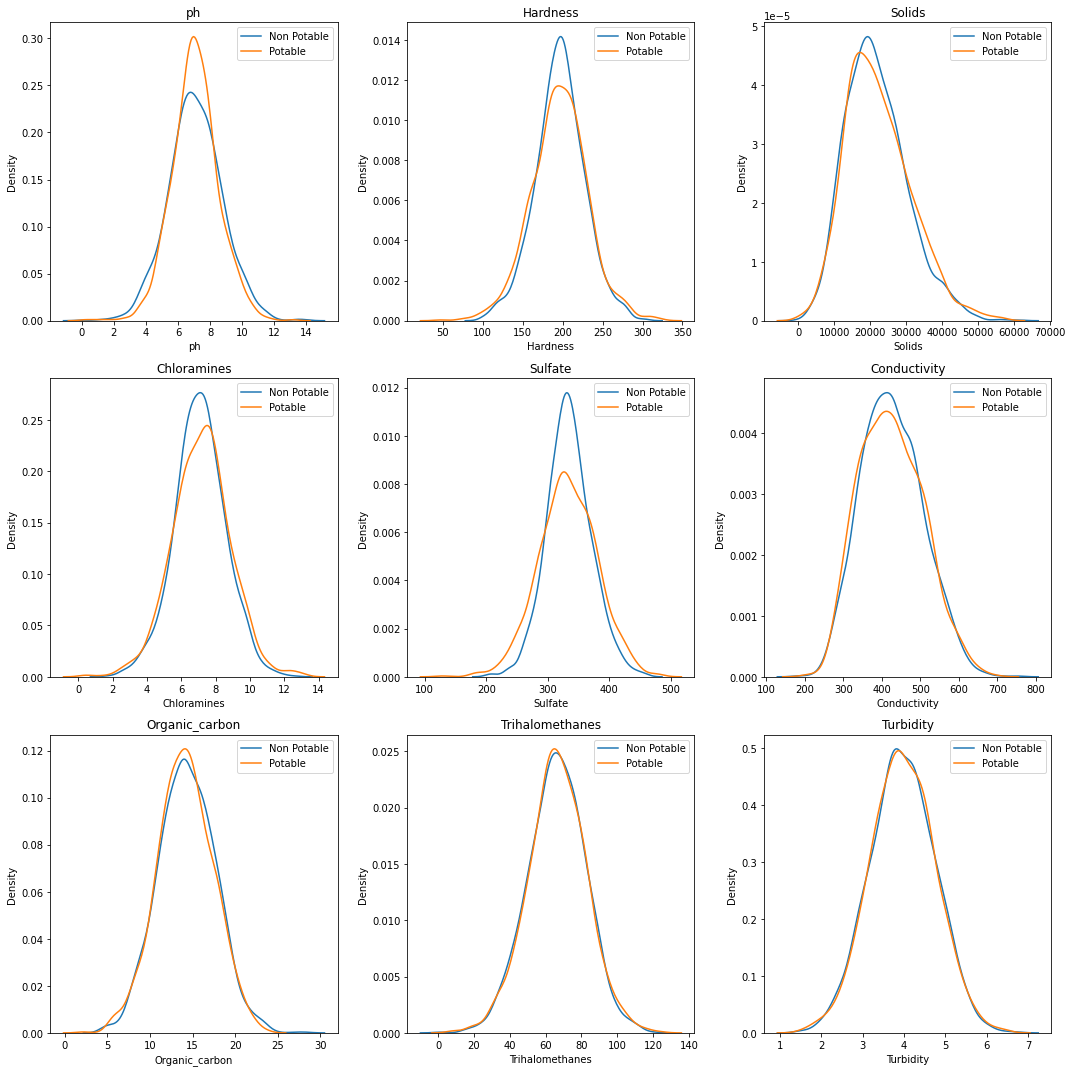

In [27]:
non_potable = df.query("Potability == 0")
potable = df.query("Potability == 1")

plt.figure(figsize = (15, 15))
for ax, col in enumerate(df.columns[:9]):
    plt.subplot(3, 3, ax + 1)
    plt.title(col)
    sns.kdeplot(x = non_potable[col], label = "Non Potable")
    sns.kdeplot(x = potable[col], label = "Potable")
    plt.legend()
plt.tight_layout()

## Data Preparation

In [129]:
# Mengisi Nilai data yang NaN pada kolom Ph, Sulfate dan Trihalomethanes
df['ph']=df['ph'].fillna(df['ph'].mean())
df['Sulfate']=df['Sulfate'].fillna(df['Sulfate'].mean())
df['Trihalomethanes']=df['Trihalomethanes'].fillna(df['Trihalomethanes'].mean())


In [131]:
#Mengecek data yang Nan
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
sulfate            0
dtype: int64

Tidak ada lagi data yang tidak memiliki nilai. semua baris dan kolom sudah terisi nilai

In [132]:
#Menampilkan statistika deskriptif pada kolom yang tadi diisi nilai rata-ratanya
df[['ph','Sulfate','Trihalomethanes']].describe()

ph      Sulfate  Trihalomethanes
count  3276.000000  3276.000000      3276.000000
mean      7.080795   333.775777        66.396293
std       1.469956    36.142612        15.769881
min       0.000000   129.000000         0.738000
25%       6.277673   317.094638        56.647656
50%       7.080795   333.775777        66.396293
75%       7.870050   350.385756        76.666609
max      14.000000   481.030642       124.000000

### Menghilangkan Data Outlier

In [133]:
#Menghitung Skor IQR
sorted(df)

Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
print(IQR)

ph                     1.592377
Hardness              39.816918
Solids             11666.071830
Chloramines            1.987466
Sulfate               33.291119
Conductivity         116.057890
Organic_carbon         4.491850
Trihalomethanes       20.018954
Turbidity              1.060609
Potability             1.000000
sulfate               33.291119
dtype: float64


In [134]:
#Menghapus Outlier
df_clear = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df_clear

ph    Hardness        Solids  ...  Turbidity  Potability     sulfate
0     7.080795  204.890455  20791.318981  ...   2.963135           0  368.516441
2     8.099124  224.236259  19909.541732  ...   3.055934           0  333.775777
3     8.316766  214.373394  22018.417441  ...   4.628771           0  356.886136
4     9.092223  181.101509  17978.986339  ...   4.075075           0  310.135738
5     5.584087  188.313324  28748.687739  ...   2.559708           0  326.678363
...        ...         ...           ...  ...        ...         ...         ...
3270  6.069616  186.659040  26138.780191  ...   3.669712           1  345.700257
3272  7.808856  193.553212  17329.802160  ...   2.798243           1  333.775777
3273  9.419510  175.762646  33155.578218  ...   3.298875           1  333.775777
3274  5.126763  230.603758  11983.869376  ...   4.708658           1  333.775777
3275  7.874671  195.102299  17404.177061  ...   2.309149           1  333.775777

[2666 rows x 11 columns]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



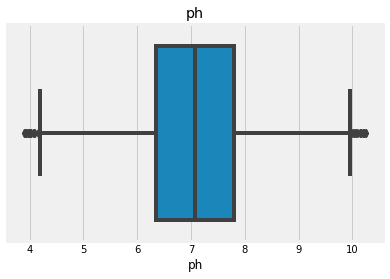

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



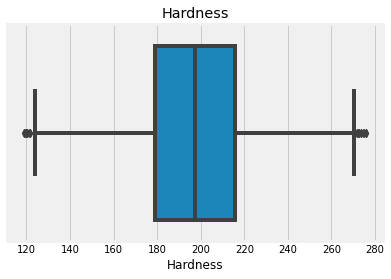

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



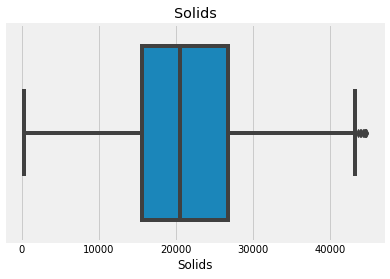

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



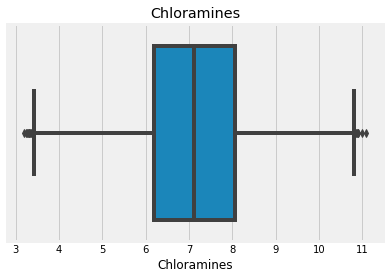

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



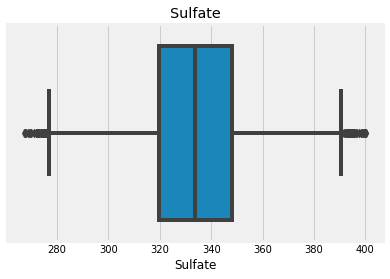

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



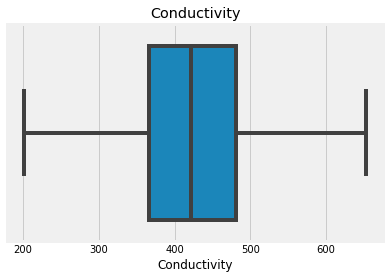

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



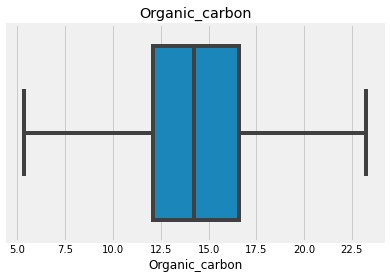

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



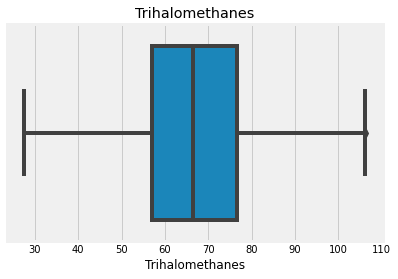

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



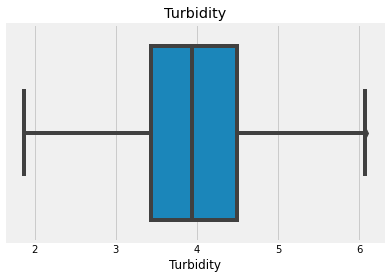

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



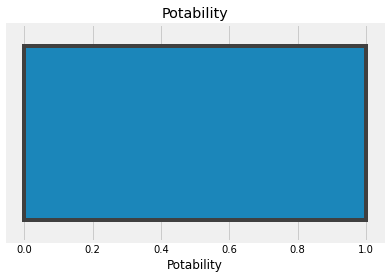

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



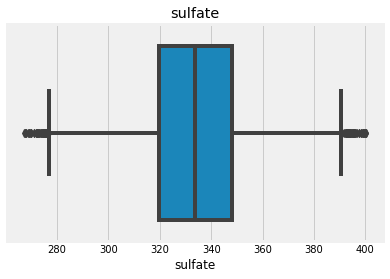

In [135]:
# Menampilkan boxplot setelah dihilangkan
for i in df_clear.columns:
    sns.boxplot(df_clear[i])
    plt.title(i)
    plt.show()

## Data Visualization

### Plot Distribusi Data setelah tidak ada data yang "missing value"

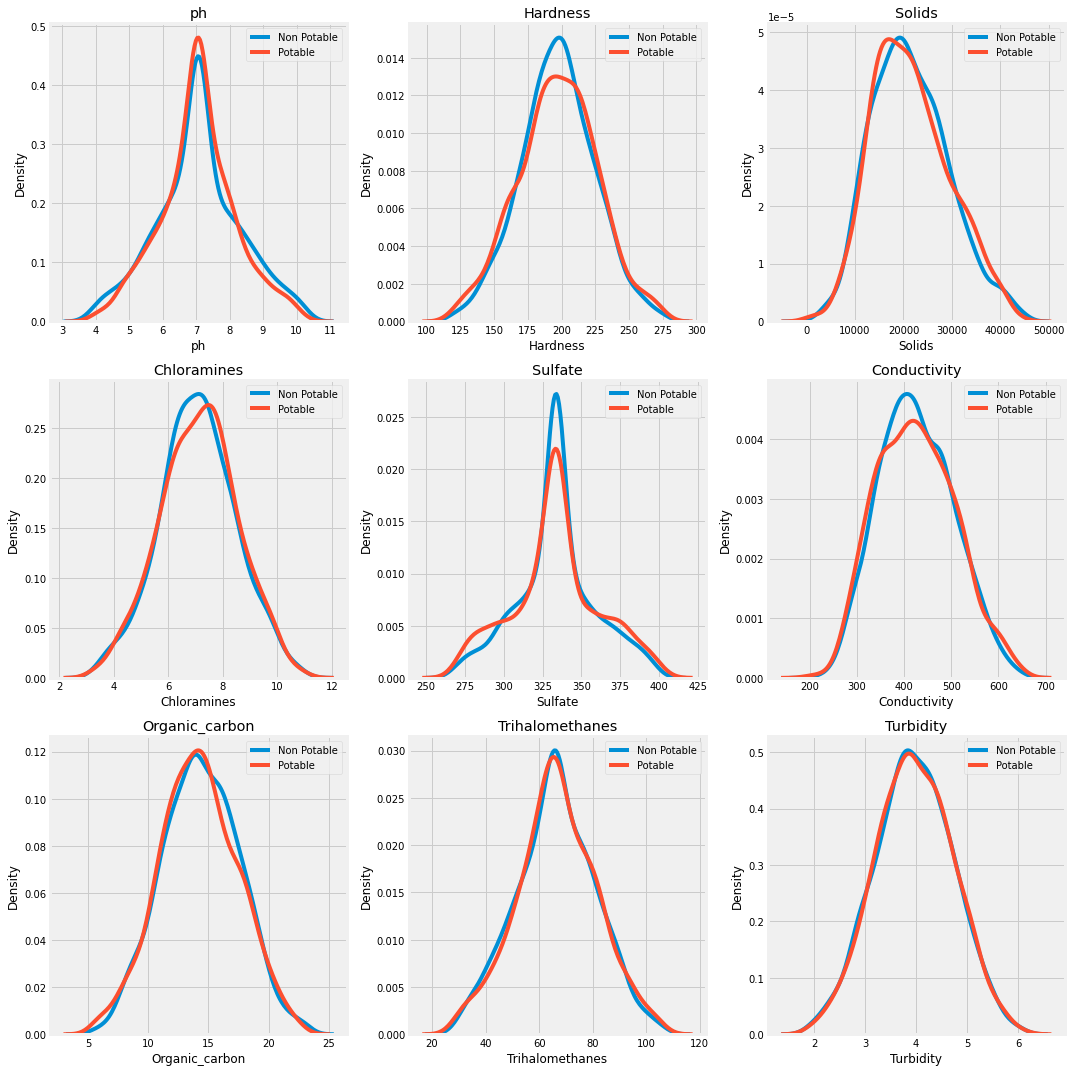

In [162]:
non_potable = df_clear.query("Potability == 0")
potable = df_clear.query("Potability == 1")

plt.figure(figsize = (15, 15))
for ax, col in enumerate(df.columns[:9]):
    plt.subplot(3, 3, ax + 1)
    plt.title(col)
    sns.kdeplot(x = non_potable[col], label = "Non Potable")
    sns.kdeplot(x = potable[col], label = "Potable")
    plt.legend()
plt.tight_layout()

Plot pada kurva Ph, Sulfate dan Trihalomethanes berubah

### Penyajian data Histogram

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning:

To output multiple subplots, the figure containing the passed axes is being cleared



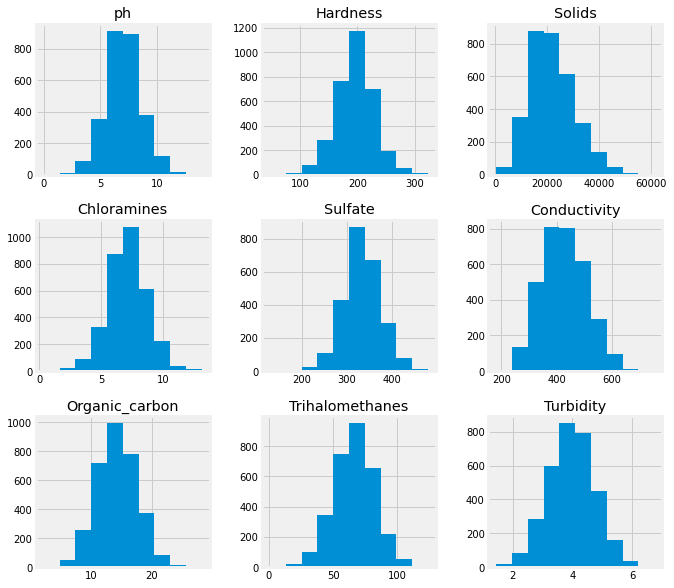

In [161]:
fig = plt.figure(figsize = (10,10))
var = df.drop("Potability", axis=1)
ax = fig.gca()
var.hist(ax=ax)
plt.show();

Dari kedua plot distribusi dan penyajian histogram.Semua variable memiliki distribusi kurva nilai yang sangat mirip. Selain itu, semuanya menunjukkan bentuk yang sangat gaussian sehingga tidak perlu menormalkan variabel apa pun. 

### Presentase data potability Water

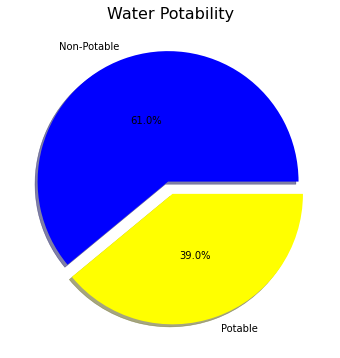

In [122]:
labels = ['Non-Potable', 'Potable']
data = [df['Potability'].value_counts()[0], df['Potability'].value_counts()[1]]
fig1, ax1 = plt.subplots(figsize=(14, 6))
ax1.pie(data, labels = labels, explode=[0.05]*2, autopct='%1.1f%%',pctdistance=0.5, shadow=True, colors = ['blue','yellow'])
plt.title("Water Potability", fontsize=16);
plt.show()

Terdapat 39% sampel air yang dapat dikonsumsi, sedangkan sebanyak 61% sample tidak dapat dikonsumsi dan harus diperlukan proses pemurnian dan filterisasi agar layak untuk menjadi air minum

In [65]:
p = df[df['Potability']==1].describe()
p

ph     Hardness  ...    Turbidity  Potability
count  1278.000000  1278.000000  ...  1278.000000      1278.0
mean      7.074754   195.800744  ...     3.968328         1.0
std       1.343955    35.547041  ...     0.780842         0.0
min       0.227499    47.432000  ...     1.492207         1.0
25%       6.351824   174.330531  ...     3.430909         1.0
50%       7.080795   196.632907  ...     3.958576         1.0
75%       7.780068   218.003420  ...     4.509569         1.0
max      13.175402   323.124000  ...     6.494249         1.0

[8 rows x 10 columns]

In [72]:
q = df[df['Potability']==0].describe()
q

ph     Hardness  ...    Turbidity  Potability
count  1998.000000  1998.000000  ...  1998.000000      1998.0
mean      7.084658   196.733292  ...     3.965800         0.0
std       1.545490    31.057540  ...     0.780282         0.0
min       0.000000    98.452931  ...     1.450000         0.0
25%       6.224046   177.823265  ...     3.444062         0.0
50%       7.080795   197.123423  ...     3.948076         0.0
75%       7.940697   216.120687  ...     4.496106         0.0
max      14.000000   304.235912  ...     6.739000         0.0

[8 rows x 10 columns]

### Penyajian Data, presentase komponen yang berpengaruh terhadap potability water

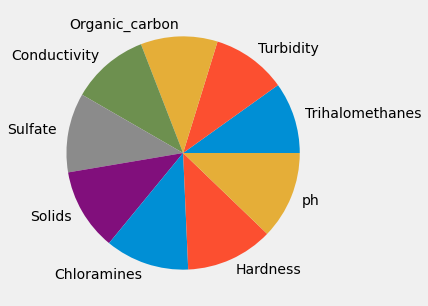

In [97]:
from sklearn.ensemble import RandomForestClassifier

x = df_clear.drop("Potability", axis=1)
y = df_clear.Potability

clasification = RandomForestClassifier()
clasification.fit(x,y)

variables = x.columns
importance = pd.DataFrame()

importance['Features'] = variables
importance['Importance'] = clasification.feature_importances_
importance = importance.sort_values(by=['Importance'],ascending=True)

labels = importance['Features']
values = importance['Importance']

plt.figure(figsize=(5,5))
plt.pie(values, labels=labels)
plt.show()

## Normalisasi Data

In [76]:
#Normalisasi data dengan MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_norm = pd.DataFrame(scaler.fit_transform(df_clear), columns=df_clear.columns)

df_norm

ph  Hardness    Solids  ...  Trihalomethanes  Turbidity  Potability
0     0.500496  0.547502  0.461758  ...         0.754090   0.258967         0.0
1     0.660854  0.670803  0.441867  ...         0.493079   0.281003         0.0
2     0.695127  0.607942  0.489438  ...         0.923489   0.654492         0.0
3     0.817239  0.395881  0.398319  ...         0.056319   0.523011         0.0
4     0.264806  0.441846  0.641255  ...         0.347135   0.163169         0.0
...        ...       ...       ...  ...              ...        ...         ...
2661  0.341264  0.431302  0.582382  ...         0.416947   0.426752         1.0
2662  0.615145  0.475243  0.383675  ...         0.492777   0.219812         1.0
2663  0.868778  0.361854  0.740663  ...         0.536541   0.338693         1.0
2664  0.192791  0.711387  0.263085  ...         0.633516   0.673463         1.0
2665  0.625509  0.485116  0.385353  ...         0.648871   0.103670         1.0

[2666 rows x 10 columns]

In [79]:
y=df_norm['Potability']
X=df_norm.drop(columns=['Potability'])

#Mengubah data menjadi array
y=np.array(y)
X=np.array(X)

print(y)
print(X)

[0. 0. 0. ... 1. 1. 1.]
[[0.50049581 0.54750164 0.46175773 ... 0.28074221 0.75408999 0.25896724]
 [0.66085409 0.67080348 0.44186716 ... 0.64381686 0.4930792  0.28100333]
 [0.69512653 0.60794182 0.48943783 ... 0.7315458  0.92348859 0.65449233]
 ...
 [0.86877776 0.3618535  0.74066282 ... 0.31763166 0.53654075 0.33869277]
 [0.1927908  0.71138718 0.26308488 ... 0.32489872 0.63351554 0.67346268]
 [0.62550908 0.48511614 0.38535274 ... 0.60306758 0.64887142 0.10367033]]


In [81]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1999, 9)
(667, 9)
(1999,)
(667,)
